=== Experiment: Epochs Tunning ===

--- Number of Epochs = 5 ---
Epoch [1/5] - Train Acc: 90.79%, Test Acc: 94.70%
Epoch [2/5] - Train Acc: 95.62%, Test Acc: 96.45%
Epoch [3/5] - Train Acc: 96.96%, Test Acc: 96.84%
Epoch [4/5] - Train Acc: 97.62%, Test Acc: 97.37%
Epoch [5/5] - Train Acc: 98.05%, Test Acc: 97.30%

Final Results for Epochs=5
Final Train Accuracy: 98.05%
Final Test Accuracy: 97.30%

--- Number of Epochs = 10 ---
Epoch [1/10] - Train Acc: 90.94%, Test Acc: 95.19%
Epoch [2/10] - Train Acc: 95.65%, Test Acc: 96.39%
Epoch [3/10] - Train Acc: 96.92%, Test Acc: 97.03%
Epoch [4/10] - Train Acc: 97.60%, Test Acc: 97.23%
Epoch [5/10] - Train Acc: 97.99%, Test Acc: 97.52%
Epoch [6/10] - Train Acc: 98.36%, Test Acc: 97.28%
Epoch [7/10] - Train Acc: 98.65%, Test Acc: 97.49%
Epoch [8/10] - Train Acc: 98.84%, Test Acc: 97.38%
Epoch [9/10] - Train Acc: 99.06%, Test Acc: 97.52%
Epoch [10/10] - Train Acc: 99.17%, Test Acc: 97.46%

Final Results for Epochs=10
Final Train Accuracy: 99.17%


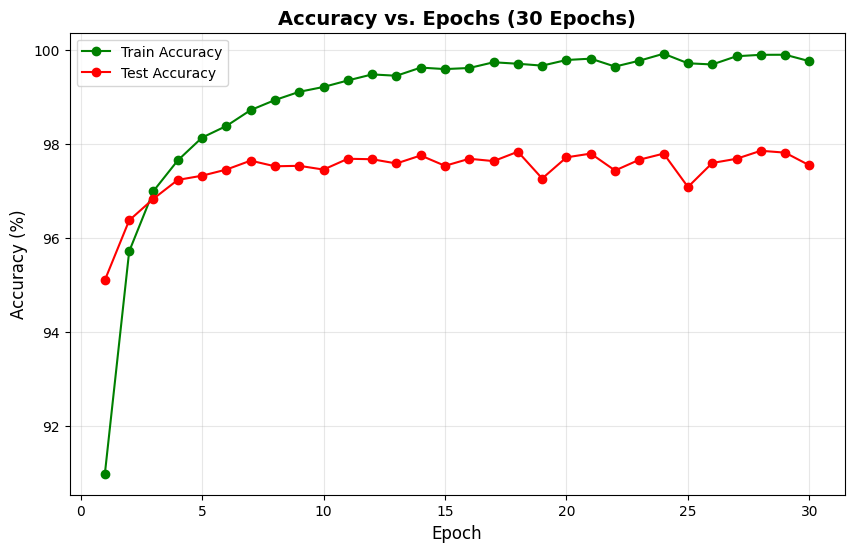

In [ ]:
# Experiment 3: Epochs Tunning
print("=== Experiment: Epochs Tunning ===")
epochs_list = [5, 10, 20, 30]
learning_rate = 1e-3
hidden_size = 100

for nb_epochs in epochs_list:
    print(f"\n--- Number of Epochs = {nb_epochs} ---")
    model = MLP(hidden_size=hidden_size).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_accuracies = []
    test_accuracies = []

    for epoch in range(nb_epochs):
        model.train()
        correct_train = 0
        total_train = 0
        for batch_idx, batch in enumerate(train_loader):
            imgs = batch["image"].to(device)
            labels = batch["label"].to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_acc = 100 * correct_train / total_train
        train_accuracies.append(epoch_train_acc)

        model.eval()
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for batch in test_loader:
                imgs = batch["image"].to(device)
                labels = batch["label"].to(device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()
        test_acc = 100 * correct_test / total_test
        test_accuracies.append(test_acc)

        print(f"Epoch [{epoch+1}/{nb_epochs}] - Train Acc: {epoch_train_acc:.2f}%, Test Acc: {test_acc:.2f}%")

    print(f"\nFinal Results for Epochs={nb_epochs}")
    print(f"Final Train Accuracy: {train_accuracies[-1]:.2f}%")
    print(f"Final Test Accuracy: {test_accuracies[-1]:.2f}%")


# 시각화 코드
plt.figure(figsize=(10, 6))
epochs_range = range(1, nb_epochs + 1)
plt.plot(epochs_range, train_accuracies, 'go-', label='Train Accuracy')
plt.plot(epochs_range, test_accuracies, 'ro-', label='Test Accuracy')
plt.title(f'Accuracy vs. Epochs ({nb_epochs} Epochs)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

=== Experiment: Sigmoid Activation Function ===
Epoch [1/3] - Train Acc: 87.89%, Test Acc: 92.89%
Epoch [2/3] - Train Acc: 93.68%, Test Acc: 94.45%
Epoch [3/3] - Train Acc: 95.14%, Test Acc: 95.34%

Final Results for Sigmoid MLP
Final Train Accuracy: 95.14%
Final Test Accuracy: 95.34%


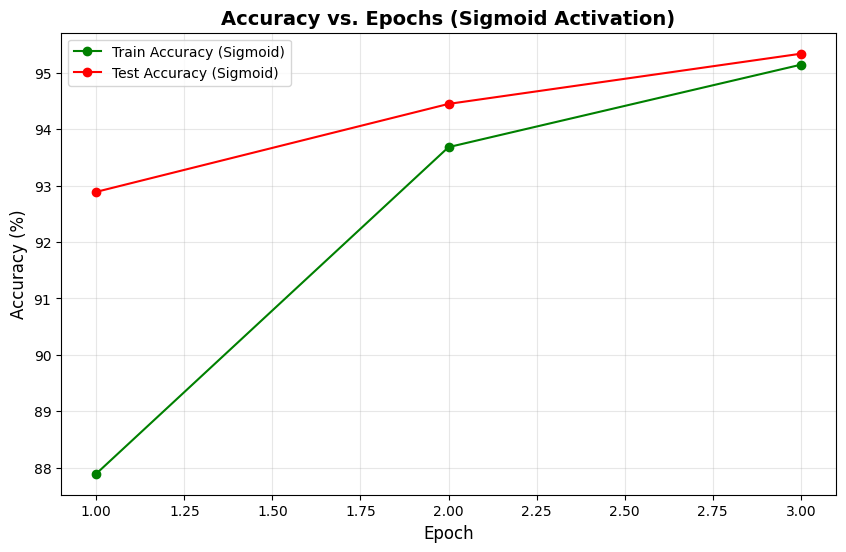

In [ ]:
# Experiment 4: Sigmoid Activation Function
print("=== Experiment: Sigmoid Activation Function ===")
learning_rate = 1e-3
nb_epochs = 3

model_sigmoid = SigmoidMLP().to(device)
optimizer_sigmoid = optim.Adam(model_sigmoid.parameters(), lr=learning_rate)

train_accuracies_sigmoid = []
test_accuracies_sigmoid = []

for epoch in range(nb_epochs):
    model_sigmoid.train()
    correct_train = 0
    total_train = 0
    for batch_idx, batch in enumerate(train_loader):
        imgs = batch["image"].to(device)
        labels = batch["label"].to(device)
        optimizer_sigmoid.zero_grad()
        outputs = model_sigmoid(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_sigmoid.step()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_train_acc = 100 * correct_train / total_train
    train_accuracies_sigmoid.append(epoch_train_acc)

    model_sigmoid.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for batch in test_loader:
            imgs = batch["image"].to(device)
            labels = batch["label"].to(device)
            outputs = model_sigmoid(imgs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_acc = 100 * correct_test / total_test
    test_accuracies_sigmoid.append(test_acc)

    print(f"Epoch [{epoch+1}/{nb_epochs}] - Train Acc: {epoch_train_acc:.2f}%, Test Acc: {test_acc:.2f}%")

print("\nFinal Results for Sigmoid MLP")
print(f"Final Train Accuracy: {train_accuracies_sigmoid[-1]:.2f}%")
print(f"Final Test Accuracy: {test_accuracies_sigmoid[-1]:.2f}%")

# 시각화 코드
plt.figure(figsize=(10, 6))
epochs_range = range(1, nb_epochs + 1)
plt.plot(epochs_range, train_accuracies_sigmoid, 'go-', label='Train Accuracy (Sigmoid)')
plt.plot(epochs_range, test_accuracies_sigmoid, 'ro-', label='Test Accuracy (Sigmoid)')
plt.title('Accuracy vs. Epochs (Sigmoid Activation)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()